# TP53: Poster Figures for UCUR 2018

### Standard imports and loading data

In [4]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC.Endometrial as CPTAC

Loading Endometrial CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter embargo() to open the webpage for more details.


In [6]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
gene = 'TP53'

### Identify patients with mutation within the hotspt

In [10]:
hotspot_mutations = ['p.P250L', 'p.R248W', 'p.S241C', 'p.241del','p.K164E', 'p.R249S', 'p.R273H', 'p.R282W',
                    'p.S127Y', 'p.G244D', 'p.A159P']
mutated_hotspot = somatic_mutations.loc[(somatic_mutations['Location'].isin(hotspot_mutations)) & (somatic_mutations['Gene'] == gene)]
# Get a list of patient identifiers for those who have mutations in the hotspot
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

## TP53 Hotspot Cis Effects

### Build dataframe for plotting

In [73]:
proteomicsdf = CPTAC.compare_mutations(proteomics, gene)
proteomicsdf = proteomicsdf.loc[proteomicsdf['Patient_Type'] == 'Tumor'][[gene, 'Mutation']]
phosdf = CPTAC.compare_mutations(phos, gene)
phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor'][['TP53-S315']]
plotdf = proteomicsdf.join(phosdf)
plotdf['TP53 Mutation Location'] = 'Outside Hotspot'
plotdf.loc[hotspot_patients, 'TP53 Mutation Location'] = 'Within Hotspot'
plotdf.loc[plotdf['Mutation'] == 'Wildtype', 'TP53 Mutation Location'] = 'Wildtype'
plotdf = pd.melt(plotdf, id_vars=['TP53 Mutation Location'], value_vars=['TP53', 'TP53-S315'], var_name='Type', value_name='Reading')
plotdf = plotdf.dropna(axis = 0)
plotdf.head(5)

,TP53 Mutation Location,Type,Reading
0,Within Hotspot,TP53,0.295
1,Wildtype,TP53,0.277
2,Wildtype,TP53,-0.871
3,Outside Hotspot,TP53,1.430
4,Wildtype,TP53,-0.343


### Create and style figure

Text(1.15,2.55,'n.s.')

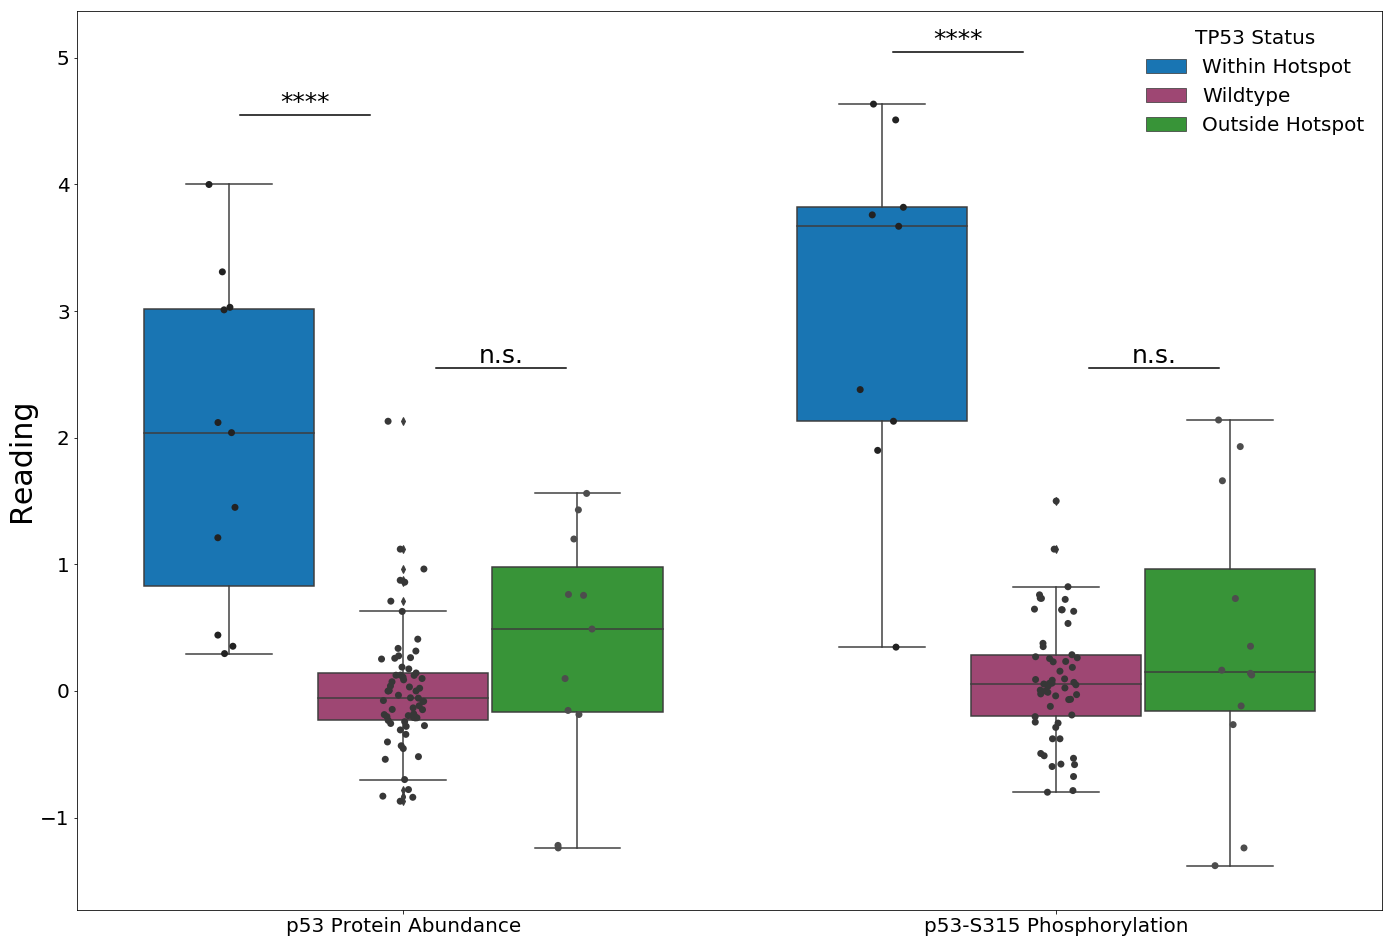

In [74]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Within Hotspot": "#007acc", "Wildtype": "#ac3973", "Outside Hotspot": "#29a329"}

#Create the plot
boxplt = sns.boxplot(x='Type', y='Reading', hue='TP53 Mutation Location', data=plotdf, palette = my_pal)
boxplt = sns.stripplot(data=plotdf, x='Type', y='Reading', hue='TP53 Mutation Location', dodge=True, jitter=True, color='.3', size=7)

#Add styling
boxplt.set_xlabel('')
boxplt.set_ylabel('Reading', fontsize='30')
boxplt.set_xticklabels(['p53 Protein Abundance', 'p53-S315 Phosphorylation'])
boxplt.tick_params(labelsize='20')

#Adjust legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], ['Within Hotspot', 'Wildtype', 'Outside Hotspot'], title='TP53 Status', fontsize='20', frameon=False)
boxplt.get_legend().get_title().set_fontsize('20')
boxplt.get_legend().set_bbox_to_anchor((1, 1, 0, 0))

#Add significance indicators: hotspot protein abundance
x1, x2 = -0.25, -0.05
y, h, col = 4.25, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='25')

#Add significance indicators: non-hotspot protein abundance
x1, x2 = 0.05, 0.25
y, h, col = 2.25, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col, fontsize='25')

#Add significance indicators: hotspot phosphorylation
x1, x2 = 0.75, 0.95
y, h, col = 4.75, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "****", ha='center', va='bottom', color=col, fontsize='25')

#Add significance indicators: non-hotspot phosphorylation
x1, x2 = 1.05, 1.25
y, h, col = 2.25, .3, 'k'
plt.plot([x1, x1, x2, x2], [y+h, y+h, y+h, y+h], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color=col, fontsize='25')

#fig = boxplt.get_figure()
#fig.savefig('p53_cis.png', dpi=300)
#plt.show()

## XPO1

### Build dataframe for plotting

In [54]:
protein = 'XPO1'
xpo1_plotdf = CPTAC.compare_mutations(proteomics, protein, gene)
xpo1_plotdf = xpo1_plotdf.loc[xpo1_plotdf['Patient_Type'] == 'Tumor'][[protein, 'Mutation']]
xpo1_plotdf['TP53 Mutation Location'] = 'Outside Hotspot'
xpo1_plotdf.loc[hotspot_patients, 'TP53 Mutation Location'] = 'Within Hotspot'
xpo1_plotdf.loc[xpo1_plotdf['Mutation'] == 'Wildtype', 'TP53 Mutation Location'] = 'Wildtype'
xpo1_plotdf = xpo1_plotdf.dropna(axis = 0)
xpo1_plotdf.head(5)

,XPO1,Mutation,TP53 Mutation Location
S001,0.107000,Missense_Mutation,Within Hotspot
S002,-0.037500,Wildtype,Wildtype
S003,-0.000832,Wildtype,Wildtype
S004,0.272000,Missense_Mutation,Outside Hotspot
S005,0.056100,Wildtype,Wildtype


### Create and style figure

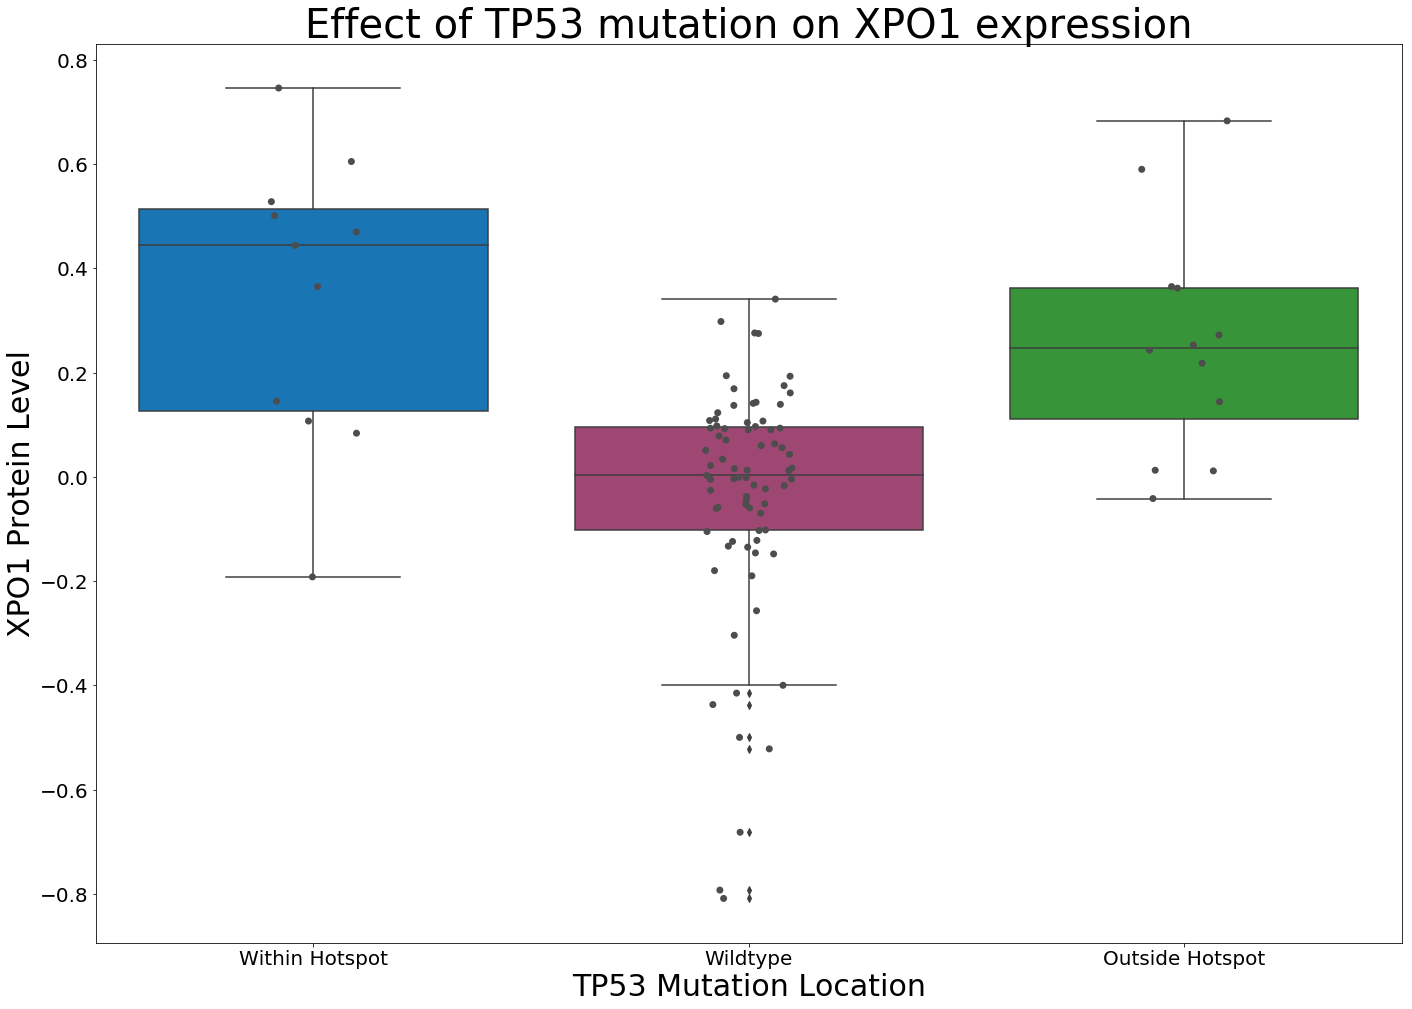

In [77]:
a4_dims = (23.4, 16.54)
fig, ax = plt.subplots(figsize = a4_dims)
my_pal = {"Within Hotspot": "#007acc", "Wildtype": "#ac3973", "Outside Hotspot": "#29a329"}

boxplt = sns.boxplot(data = xpo1_plotdf, x = 'TP53 Mutation Location', y = protein, ax = ax, palette = my_pal)
boxplt = sns.stripplot(data = xpo1_plotdf, x = 'TP53 Mutation Location', y = protein, jitter = True, color = '.3', size=7)
boxplt.set_xlabel('TP53 Mutation Location', fontsize='30')
boxplt.tick_params(labelsize='20')
boxplt.set_ylabel(protein + ' Protein Level', fontsize='30')
boxplt.set_title("Effect of " + gene + " mutation on " + protein + " expression", fontsize='40')
plt.show()